In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "../datasets/lahman"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd

BASEBALL_PATH = os.path.join('..', 'datasets', 'lahman')
PITCHERS = 'Pitching.csv'

def load_baseball_data(baseball_path=BASEBALL_PATH, data_csv=PITCHERS):
    csv_path=os.path.join(baseball_path, data_csv)
    return pd.read_csv(csv_path)

In [3]:
teams = load_baseball_data(data_csv='Teams.csv')
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [4]:
teams.axes

[RangeIndex(start=0, stop=2925, step=1),
 Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
        'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
        '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
        'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
        'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
        'teamIDlahman45', 'teamIDretro'],
       dtype='object')]

In [5]:
len(teams)

2925

In [6]:
recent_years = teams['yearID']

In [7]:
recent_years.head()

0    1871
1    1871
2    1871
3    1871
4    1871
Name: yearID, dtype: int64

In [8]:
len(recent_years)

2925

In [9]:
type(recent_years)

pandas.core.series.Series

In [10]:
recent_years[2925-5*30]

2015

In [11]:
teams['yearID'][2775]

2015

In [12]:
# there have been 30 teams past 5 years
# update so it's only 2015-2019 seasons
recent_years = 30 * 5

recent_teams = teams.tail(recent_years)
recent_teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2775,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2776,2015,NL,ATL,ATL,E,4,162,81.0,67,95,...,186,0.985,Atlanta Braves,Turner Field,2001392.0,97,97,ATL,ATL,ATL
2777,2015,AL,BAL,BAL,E,3,162,78.0,81,81,...,134,0.987,Baltimore Orioles,Oriole Park at Camden Yards,2281202.0,103,104,BAL,BAL,BAL
2778,2015,AL,BOS,BOS,E,5,162,81.0,78,84,...,148,0.984,Boston Red Sox,Fenway Park II,2880694.0,104,107,BOS,BOS,BOS
2779,2015,AL,CHA,CHW,C,4,162,81.0,76,86,...,159,0.983,Chicago White Sox,U.S. Cellular Field,1755810.0,92,93,CHW,CHA,CHA


In [13]:
recent_teams = teams[teams['yearID'] >= 2015]

In [14]:
recent_teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

[-18.54323674]
159.3679571815101


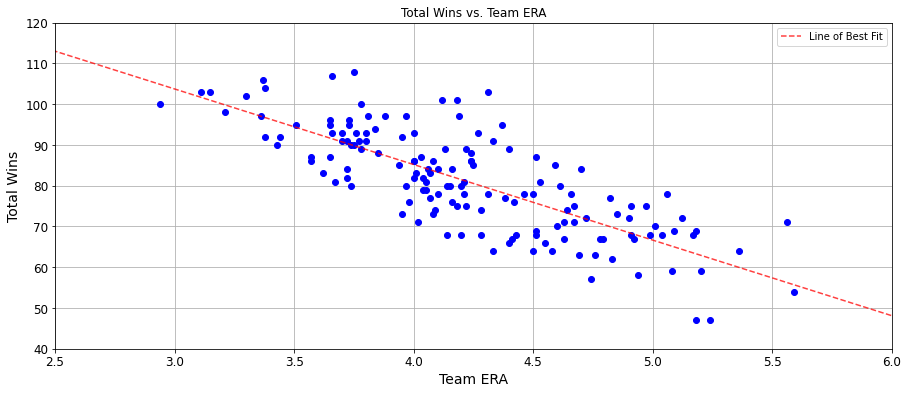

In [43]:
#recent_teams.plot(kind='scatter', x='ERA', y='W', figsize=(10,7))
#save_fig('ERAvW')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,6)
ax.plot(recent_teams.loc[:,'ERA'], recent_teams.loc[:,'W'], 'bo', alpha=1)
ax.set_xlabel('Team ERA')
ax.set_ylabel('Total Wins')
ax.set_title('Total Wins vs. Team ERA')
ax.grid()

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(recent_teams.loc[:,'ERA'].to_numpy().reshape(-1,1), recent_teams.loc[:,'W'])

print(reg.coef_)
print(reg.intercept_)

x = [x for x in np.arange(7)]
y = [reg.coef_*i + reg.intercept_ for i in x]
ax.plot(x,y, '--r', alpha=0.75, label='Line of Best Fit')
ax.set_xlim(2.5,6)
ax.set_ylim(40,120)
ax.legend()

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + 'wins_vs_era.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [23]:
recent_teams['ERA'].corr(recent_teams['W'], method='pearson')

-0.7794892147497666

[0.10757277]
2.0364354496267367


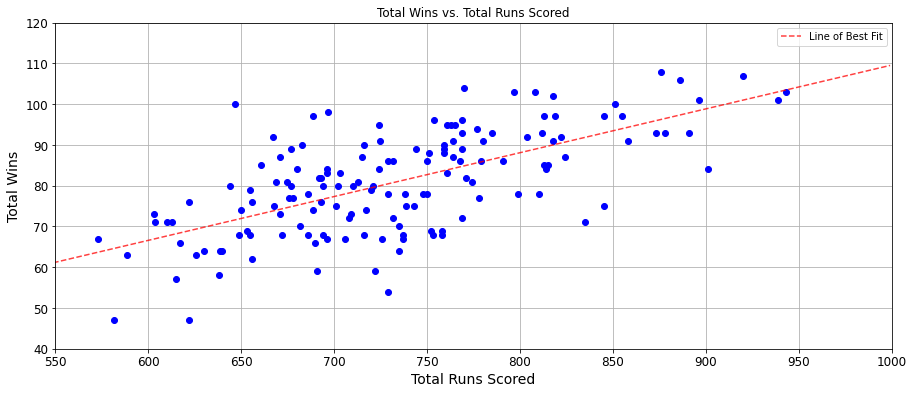

In [50]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,6)

ax.plot(recent_teams.loc[:,'R'], recent_teams.loc[:,'W'], 'bo', alpha=1)
ax.set_xlabel('Total Runs Scored')
ax.set_ylabel('Total Wins')
ax.set_title('Total Wins vs. Total Runs Scored')
ax.grid()

reg = LinearRegression().fit(recent_teams.loc[:,'R'].to_numpy().reshape(-1,1), recent_teams.loc[:,'W'])

print(reg.coef_)
print(reg.intercept_)

x = [x for x in np.arange(1000)]
y = [reg.coef_*i + reg.intercept_ for i in x]
ax.plot(x,y, '--r', alpha=0.75, label='Line of Best Fit')
ax.set_xlim(550,1000)
ax.set_ylim(40,120)
ax.legend()

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + 'wins_vs_runs.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [16]:
recent_teams['R'].corr(recent_teams['W'], method='pearson')

0.6507681803452142

<AxesSubplot:xlabel='attendance', ylabel='W'>

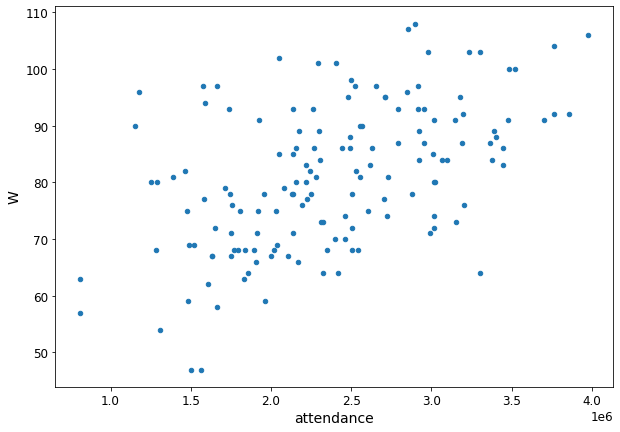

In [17]:
recent_teams.plot(kind='scatter', x='attendance', y='W', figsize=(10,7))

In [51]:
recent_teams["R/ERA"] = recent_teams['R'] / recent_teams['ERA']

<ipython-input-51-b5f64f7f737a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_teams["R/ERA"] = recent_teams['R'] / recent_teams['ERA']


In [52]:
recent_teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,R/ERA
2775,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI,178.217822
2776,2015,NL,ATL,ATL,E,4,162,81.0,67,95,...,0.985,Atlanta Braves,Turner Field,2001392.0,97,97,ATL,ATL,ATL,129.931973
2777,2015,AL,BAL,BAL,E,3,162,78.0,81,81,...,0.987,Baltimore Orioles,Oriole Park at Camden Yards,2281202.0,103,104,BAL,BAL,BAL,176.049383
2778,2015,AL,BOS,BOS,E,5,162,81.0,78,84,...,0.984,Boston Red Sox,Fenway Park II,2880694.0,104,107,BOS,BOS,BOS,173.549884
2779,2015,AL,CHA,CHW,C,4,162,81.0,76,86,...,0.983,Chicago White Sox,U.S. Cellular Field,1755810.0,92,93,CHW,CHA,CHA,156.281407


[0.3725969]
15.118329137411493


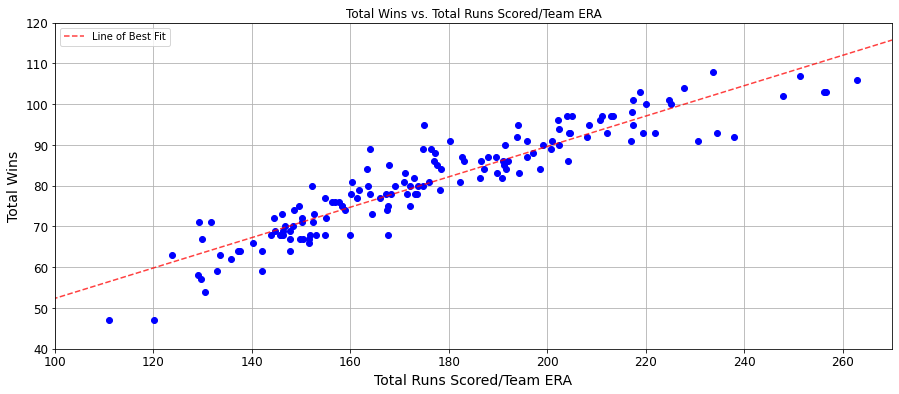

In [64]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,6)

ax.plot(recent_teams.loc[:,'R/ERA'], recent_teams.loc[:,'W'], 'bo', alpha=1)
ax.set_xlabel('Total Runs Scored/Team ERA')
ax.set_ylabel('Total Wins')
ax.set_title('Total Wins vs. Total Runs Scored/Team ERA')
ax.grid()

reg = LinearRegression().fit(recent_teams.loc[:,'R/ERA'].to_numpy().reshape(-1,1), recent_teams.loc[:,'W'])

print(reg.coef_)
print(reg.intercept_)

x = [x for x in np.arange(1000)]
y = [reg.coef_*i + reg.intercept_ for i in x]
ax.plot(x,y, '--r', alpha=0.75, label='Line of Best Fit')
ax.set_xlim(100,270)
ax.set_ylim(40,120)
ax.legend()

path = '/mnt/c/Users/Michael/Documents/UCONN/courses/Senior Design/figures/'
plt.savefig(path + 'wins_vs_ratio.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [54]:
recent_teams['R/ERA'].corr(recent_teams['W'], method='pearson')

0.9284423434515336

In [24]:
recent_teams['scored_per_allowed'] = recent_teams['R'] / recent_teams['RA']

<ipython-input-24-25b50c1b6c9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_teams['scored_per_allowed'] = recent_teams['R'] / recent_teams['RA']


<AxesSubplot:xlabel='scored_per_allowed', ylabel='W'>

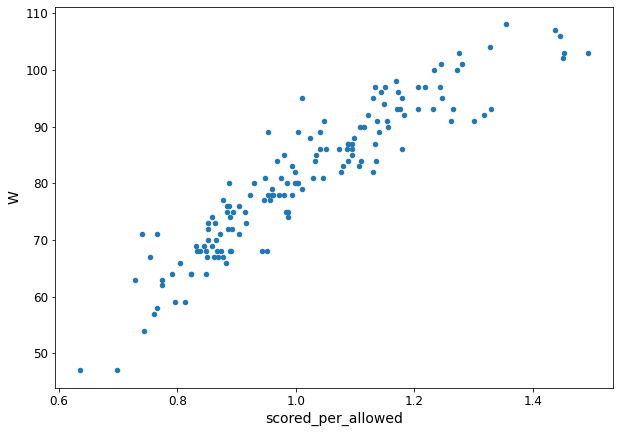

In [25]:
recent_teams.plot(kind='scatter', x='scored_per_allowed', y='W', figsize=(10,7))

In [26]:
recent_teams['scored_per_allowed'].corr(recent_teams['W'], method='pearson')

0.930501570788262

In [27]:
recent_teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,ratio,scored_per_allowed
2775,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI,178.217822,1.009818
2776,2015,NL,ATL,ATL,E,4,162,81.0,67,95,...,Atlanta Braves,Turner Field,2001392.0,97,97,ATL,ATL,ATL,129.931973,0.753947
2777,2015,AL,BAL,BAL,E,3,162,78.0,81,81,...,Baltimore Orioles,Oriole Park at Camden Yards,2281202.0,103,104,BAL,BAL,BAL,176.049383,1.028860
2778,2015,AL,BOS,BOS,E,5,162,81.0,78,84,...,Boston Red Sox,Fenway Park II,2880694.0,104,107,BOS,BOS,BOS,173.549884,0.993360
2779,2015,AL,CHA,CHW,C,4,162,81.0,76,86,...,Chicago White Sox,U.S. Cellular Field,1755810.0,92,93,CHW,CHA,CHA,156.281407,0.887304


In [28]:
recent_teams.reset_index()

,index,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,ratio,scored_per_allowed
0,2775,2015,NL,ARI,ARI,W,3,162,81.0,79,...,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI,178.217822,1.009818
1,2776,2015,NL,ATL,ATL,E,4,162,81.0,67,...,Atlanta Braves,Turner Field,2001392.0,97,97,ATL,ATL,ATL,129.931973,0.753947
2,2777,2015,AL,BAL,BAL,E,3,162,78.0,81,...,Baltimore Orioles,Oriole Park at Camden Yards,2281202.0,103,104,BAL,BAL,BAL,176.049383,1.028860
3,2778,2015,AL,BOS,BOS,E,5,162,81.0,78,...,Boston Red Sox,Fenway Park II,2880694.0,104,107,BOS,BOS,BOS,173.549884,0.993360
4,2779,2015,AL,CHA,CHW,C,4,162,81.0,76,...,Chicago White Sox,U.S. Cellular Field,1755810.0,92,93,CHW,CHA,CHA,156.281407,0.887304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2920,2019,NL,SLN,STL,C,1,162,81.0,91,...,St. Louis Cardinals,Busch Stadium III,3480393.0,98,97,STL,SLN,SLN,201.052632,1.154079
146,2921,2019,AL,TBA,TBD,E,2,162,81.0,96,...,Tampa Bay Rays,Tropicana Field,1178735.0,97,96,TBR,TBA,TBA,210.684932,1.172256
147,2922,2019,AL,TEX,TEX,W,3,162,81.0,78,...,Texas Rangers,Globe Life Park in Arlington,2132994.0,111,112,TEX,TEX,TEX,160.079051,0.922551
148,2923,2019,AL,TOR,TOR,E,4,162,81.0,67,...,Toronto Blue Jays,Rogers Centre,1750114.0,97,98,TOR,TOR,TOR,151.565762,0.876812


In [29]:
recent_teams.loc[2775, ]

yearID                                2015
lgID                                    NL
teamID                                 ARI
franchID                               ARI
divID                                    W
Rank                                     3
G                                      162
Ghome                                   81
W                                       79
L                                       83
DivWin                                   N
WCWin                                    N
LgWin                                    N
WSWin                                    N
R                                      720
AB                                    5649
H                                     1494
2B                                     289
3B                                      48
HR                                     154
BB                                     490
SO                                    1312
SB                                     132
CS         

In [30]:
recent_teams_stats = recent_teams.drop(columns=['lgID', 'teamID', 'franchID', 'divID', 'DivWin', 
                                       'WCWin', 'LgWin', 'WSWin', 'name', 'park', 
                                       'teamIDBR', 'teamIDlahman45', 'teamIDretro'])

In [31]:
recent_teams_stats.head()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,BBA,SOA,E,DP,FP,attendance,BPF,PPF,ratio,scored_per_allowed
2775,2015,3,162,81.0,79,83,720,5649,1494,289,...,500,1215,86,146,0.986,2080145.0,107,106,178.217822,1.009818
2776,2015,4,162,81.0,67,95,573,5420,1361,251,...,550,1148,90,186,0.985,2001392.0,97,97,129.931973,0.753947
2777,2015,3,162,78.0,81,81,713,5485,1370,246,...,483,1233,77,134,0.987,2281202.0,103,104,176.049383,1.028860
2778,2015,5,162,81.0,78,84,748,5640,1495,294,...,478,1218,97,148,0.984,2880694.0,104,107,173.549884,0.993360
2779,2015,4,162,81.0,76,86,622,5533,1381,260,...,474,1359,101,159,0.983,1755810.0,92,93,156.281407,0.887304


In [32]:
recent_team_min = recent_teams.loc[:, ('ER', 'R', 'RA', 'W')]

In [33]:
recent_team_min.head()

,ER,R,RA,W
2775,659,720,713,79
2776,698,573,760,67
2777,646,713,693,81
2778,694,748,753,78
2779,643,622,701,76


In [34]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(recent_team_min, test_size=0.2, random_state=42)

In [35]:
X_train, y_train, X_test, y_test = train_set.loc[:, ("ER", "R", "RA")], train_set["W"], test_set.loc[:, ("ER", "R", "RA")], test_set["W"]

In [36]:
from sklearn.linear_model import LinearRegression

#X_train.reshape(-1, 1)

teams_reg = LinearRegression()
teams_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
print("Predictions:\t", teams_reg.predict(X_train.iloc[:5]))
print("Labels:\t\t", list(y_train.iloc[:5]))

Predictions:	 [73.94437959 73.42835216 92.89070453 89.35727965 79.98381393]
Labels:		 [74, 68, 92, 95, 74]


In [38]:
from sklearn.metrics import mean_squared_error

team_win_pred = teams_reg.predict(X_train)
team_reg_mse = mean_squared_error(y_train, team_win_pred)
team_reg_rmse = np.sqrt(team_reg_mse)
team_reg_rmse

4.17471109410321

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
win_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, win_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
rmse_scores = np.sqrt(-scores)

In [42]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [43]:
display_scores(rmse_scores)

Scores: [9.13920128 6.42845238 8.36062199]
Mean: 7.976091881430858
Standard Deviation: 1.1395722731092648


In [44]:
lin_scores = cross_val_score(teams_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.80501762 4.49413494 4.61348256]
Mean: 4.304211704762609
Standard Deviation: 0.35633038606797446


In [45]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_predictions = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-forest_predictions)
display_scores(forest_rmse_scores)

Scores: [4.849767   5.32511479 6.06344292]
Mean: 5.412774902857167
Standard Deviation: 0.4993432530163129


In [46]:
recent_teams_stats["W"].min()

47

In [47]:
recent_teams_stats["W"].max()

108